In [1]:
%cd ..

D:\SoftUni\Data Science\ProjectV2


In [2]:
# Imports
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src import functions

# Mental disorders and drugs distribution

## Exploratory Data Analysis of data, containing information about the worldwide drug trade and mental illnesses

### Backgroun information

Mental illnesses are among the most common health conditions worldwide. According to World Health Organization(WHO), in 2019, one in every eight people, or 970 million people around the world, has lived with a mental disorder. There are many different types of mental disorders. One of the most comon mental health conditions are anxiety disorders, schizophrenia, bipolar disorder, depression, post - traumatic stress disorder, eating disorders, obsessive - compulsive disorder and substance use disorders(SUDs). [[1]](#ref) SUD, also called drug addiction, is the persistent use of drugs despite the substantial harm and adverse consequences as a result of their use. [[9]](#ref) It is highly prevalent worldwide and are among the leading causes of morbidity and mortality. SUDs are also highly comorbid with other mental health disorders. This comorbidity can complicate treatment course and recovery from both the SUD and other mental health disorders. [[2]](#ref)

At the other hand, illicit drugs production, distribution and sale are big businesses. They are one of the main profit - generating activities of organised crime and are estimated to represent around one - fifth of global crime proceeds. [[5]](#ref) Such an activities fostering extreme violence and corruption, while greatly endangers public health and safety. Some of the most commonly abused illicit drugs are: marijuana, cocaine, stimulants(such as amphetamine), heroin, hallucinogens and methamphetamine.

### Project theme

According to the information presented above, one may ask, **is there a relationship between the level of illicit drug market and the rate of mental health issues**. That is the **question** of this study.

While the higher rate of drugs distribution cannot directly cause mental illnesses, it increases these substances availability and makes them more accessible. This can lead to an increase of drug abuse which can significantly impact mental health and potentially lead to mental disorders. Different illicit substances are related to different mental disorders. [[10]](#ref) Drugs can cause direct effect on the brain like affecting the neurotransmitters, such as dopamine and serotonin, which play crucial roles in mood regulation. Long - term use of certain substances like cocaine, methamphetamine or ecstasy can lead to imbalances in brain chemistry and increase the risk of developing disorders such as depression, anxiety and psychosis. [[8]](#ref) Substance use also can lead to changes in some of the same brain areas that are disrupted in other mental disorders, such as schizophrenia, anxiety, mood or impulse - control disorders. Drug use that precedes the first symptoms of a mental illness may produce changes in the brain structure and function that trigger an underlying predisposition to develop that mental illness. [[3]](#ref) According to National Drug Intelligence Center(now DEA), some common serious mental disorders associated with chronic drug abuse include schizophrenia, bipolar disorder, manic depression, attention deficit hyperactivity disorder (ADHD), generalized anxiety disorder, obsessive-compulsive disorder, post - traumatic stress disorder, panic disorder, and antisocial personality disorder. [[4]](#ref)

My **hypothesis** is that **the production, distribution and sales of illicit drugs contribute to the availability and use of these substances, which in turn can lead to mental health issues among people who use them**. 

In this project I will explore data, containing information about the rates of some common mental illnesses, together with data about the levels of the most spread drugs worldwide. The goal of the analysis is to examine the data looking for relationships which could support the hypothesis. It should be noted that there are many factors that could affect the levels of mental illnesses besides the drugs distribution. Healthcare system, environmental stress factors(like wars and urbanization), socioeconomic status, genetic predisposition and lifestyle factors(like poor nutrition) may have greather effect on the mental disorders rate. Moreover the drug metrics provided in 'Global organized crime index' cover not only the use but also the production, distribution and sale of this substances. There are countries where the production is concentrated, other countries through which distribution passes, and finaly the countries where the drugs are saled. So even if it exists, the relationship may not be direct.

### Research process
The steps I have followed in the research process are:
1. Learning information about the related topics
2. Gathering relevant data from different sources
3. Initial exploring, cleaning and preprocessing(for analysis purposes) the data
4. Мerging the data into one common dataset
5. Analysing the resulted dataset
6. Drawing a conclusion for the analysis

The project is created with JupyterLab, Python and tools for data manipulation and visualization.
The work is organised in four notebooks(located in 'notebooks' folder). Three of them are used for data cleaning and preprocessing and one for merging the data into the final working dataset. These side notebooks are used to keep the main one, where the analysis is, clean. The source and transformed datasets are provided in 'data' folder. The source code is separated in functions.py file in the 'src' folder. In order to obtain the working dataset for the main notebook, the side notebooks have to be runned in following order: preprocess notebooks first and then mering notebook.

The project is uploaded to [GitHub](https://github.com/finarfin11/mental_disorders_and_drugs_market).

### Data sources
The data is gathered from two sources: 
1. Institute for Health Metrics and Evaluation provides information about mental disorders rates around the world. [[6]](#ref)
   The six source datasets contain information about prevalent cases of anxiety, attention deficit/hyperactivity, bipolar and depressive disorders, schizophrenia and substance use disorders(related only to drugs) for 2021 globally. They are loaded, explored and cleaned in mental_disorders_preprocess_notebook. This is also the source of data about ranking of healthcare systems.This dataset will be used to separate the countries with better healthcare. 
   
2. Global Organized Crime Index for 2021(provided by Global Initiative Against Transnational Organized Crime). [[7]](#ref) This dataset provides information about levels of organized crime in 193 countries across the world. Among other data, this index covers the production, distribution, sale and consumption of heroin, cocaine, cannabis and synthetic drugs. The dataset is loaded, explored and cleaned in drugs_preprocess_notebook.

Feature selection, merging and feature engineering are used to obtain the final 'main' dataset.

### EDA

#### Loading dataset

In [3]:
data = pd.read_csv('data/final_merged_dataset/drugs_disorders_by_country.csv')

The dataset contains information about levels of heroin, cocaine, cannabis and synthetic drugs distribution and also about rates of  anxiety, attention deficit/hyperactivity, bipolar and depressive disorders, schizophrenia and substance use disorder.

In [4]:
data

,country,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
0,Turkey,8.0,4.0,5.0,5.5,5420.0,1375.0,737.0,4730.0,246.0,323.0
1,Cabo Verde,4.0,7.0,5.0,4.5,3496.0,505.0,473.0,5801.0,241.0,291.0
2,South Africa,7.5,5.5,3.5,8.5,4826.0,498.0,507.0,5310.0,228.0,775.0
3,Colombia,5.0,9.5,8.0,5.0,5601.0,1549.0,718.0,2460.0,242.0,911.0
4,Peru,3.5,9.0,5.5,4.0,7241.0,2183.0,835.0,2697.0,243.0,474.0
...,...,...,...,...,...,...,...,...,...,...,...
187,Jamaica,3.0,6.0,9.0,3.0,5211.0,3073.0,844.0,3491.0,226.0,1013.0
188,St. Vincent and the Grenadines,1.0,7.5,7.5,1.0,5195.0,3094.0,830.0,3849.0,224.0,848.0
189,Slovenia,4.0,4.5,5.0,5.5,4076.0,1011.0,481.0,3693.0,229.0,655.0
190,St. Lucia,1.0,7.0,7.0,1.0,5465.0,3093.0,839.0,3908.0,227.0,936.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    192 non-null    object 
 1   heroin_trade               192 non-null    float64
 2   cocaine_trade              192 non-null    float64
 3   cannabis_trade             192 non-null    float64
 4   synthetic_drug_trade       192 non-null    float64
 5   anxiety_disorders_rate     192 non-null    float64
 6   adh_disorders_rate         192 non-null    float64
 7   biploar_disorders_rate     192 non-null    float64
 8   depressive_disorders_rate  192 non-null    float64
 9   schizophrenia_rate         192 non-null    float64
 10  suds_rate                  192 non-null    float64
dtypes: float64(10), object(1)
memory usage: 16.6+ KB


In [6]:
data.duplicated().unique()

array([False])

The data is valid. The dataset has 192 observations of 11 features with no duplicated observations or missing values.

#### Descriptive statistics of data

In [7]:
data.describe()

,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,3.984375,4.533854,5.109375,4.635417,4852.750000,1203.937500,590.333333,4363.369792,246.630208,625.192708
std,2.061176,2.016334,1.554765,2.053575,1391.665731,752.202891,209.057655,1068.873044,34.285737,380.268160
min,1.000000,1.000000,1.000000,1.000000,2257.000000,396.000000,173.000000,1858.000000,196.000000,197.000000
25%,2.000000,3.000000,4.000000,3.000000,3993.000000,520.250000,467.000000,3498.500000,222.000000,369.500000
50%,4.000000,4.500000,5.000000,4.500000,4564.000000,1010.500000,549.000000,4334.500000,236.000000,552.000000
75%,5.500000,6.000000,6.000000,6.000000,5582.250000,1313.750000,793.500000,5035.500000,266.250000,756.000000
max,9.500000,9.500000,9.000000,9.500000,9712.000000,3362.000000,1378.000000,7770.000000,388.000000,3652.000000


Among mental disorders, anxiety and deppresions have the highest rates, followed at much lower rates by attention deficit/hyperactivity disorder, substance use disorders, bipolar disorder and shizophrenia. The standard deviation is noticeable high and closer to the mean at sud and attention deficit/hyperactivity disorders. All maximum values are much farther from the mean than minimums.

Drugs metrics vary on the scale between 1 an 10, with mean values ranging from 3.98 to 5.11. All min values are equal to 1 and maximums are at 9 or 9.5. Cannabis is the most distributed substance, followed by syntetics and cocaine. Heroine has the smallest share of distribution.

In [8]:
drug_trade_metrics = ['heroin_trade', 'cocaine_trade', 'cannabis_trade', 'synthetic_drug_trade']

In [9]:
mental_disorders_metrics = ['anxiety_disorders_rate', 'adh_disorders_rate', 'biploar_disorders_rate', 'depressive_disorders_rate', 'schizophrenia_rate', 'suds_rate']

#### Distributions of drug markets

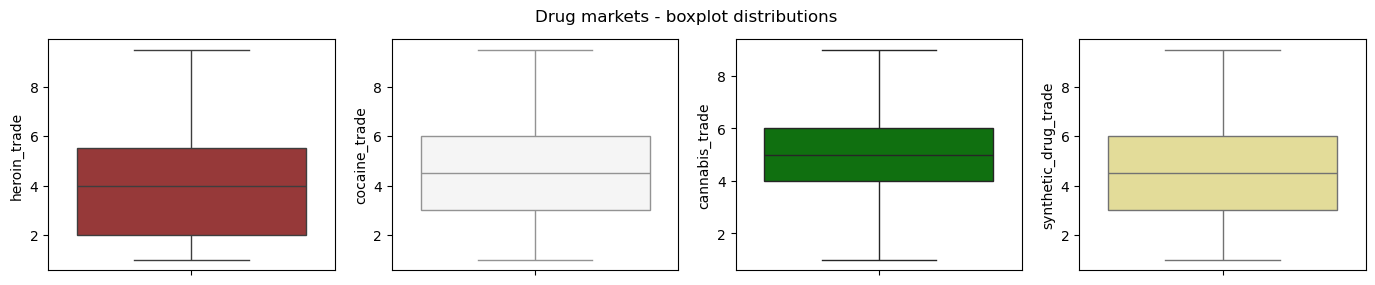

In [10]:
fig, axes = plt.subplots(1, 4, figsize = (17, 3))

sns.boxplot(data['heroin_trade'], ax = axes[0], color = 'brown')
sns.boxplot(data['cocaine_trade'], ax = axes[1], color = 'whitesmoke')
sns.boxplot(data['cannabis_trade'], ax = axes[2], color = 'green')
sns.boxplot(data['synthetic_drug_trade'], ax = axes[3], color = 'khaki')

fig.suptitle('Drug markets - boxplot distributions')

plt.show()

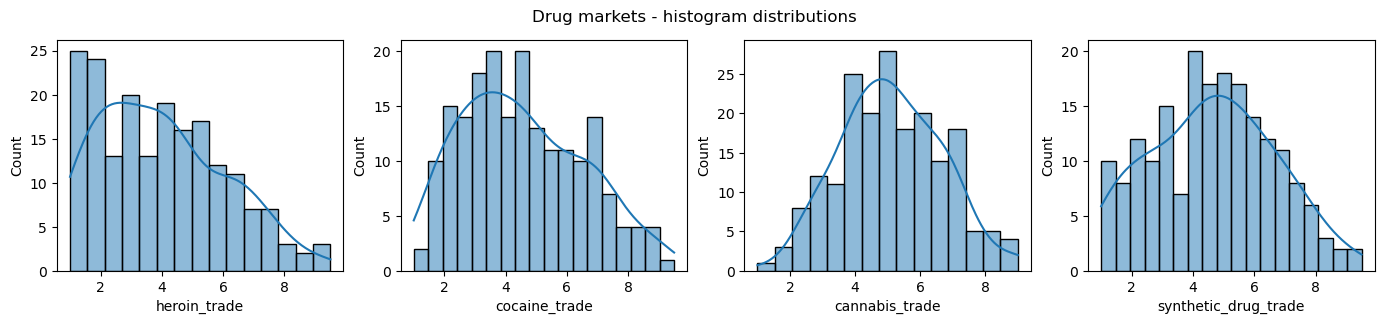

In [11]:
fig, axes = plt.subplots(1, 4, figsize = (17, 3))

sns.histplot(ax = axes[0], data = data, x = 'heroin_trade', bins = 15, kde = True)
sns.histplot(ax = axes[1], data = data, x = 'cocaine_trade', bins = 18, kde = True)
sns.histplot(ax = axes[2], data = data, x = 'cannabis_trade', bins = 15, kde = True)
sns.histplot(ax = axes[3], data = data, x = 'synthetic_drug_trade', bins = 18, kde = True)

fig.suptitle('Drug markets - histogram distributions')

plt.show()

In [12]:
data[drug_trade_metrics].skew()

heroin_trade            0.505574
cocaine_trade           0.381430
cannabis_trade          0.141129
synthetic_drug_trade    0.080517
dtype: float64

Boxplots of drug metrics show that, while there are no outliers, the whsiskers are extended, more noticeable on the upper side, especially at heroin, cocaine and synthetics. All distributions have positive skewness, most pronounced at heroin and cocaine trade, which indicates the presence of some countries with significantly higher levels of this activities. Cannabis trade is concentrated in the middle, with fewer countries having either very low or very high levels, and seems more evenly distributed worldwide.

#### Distributions of mental disorders

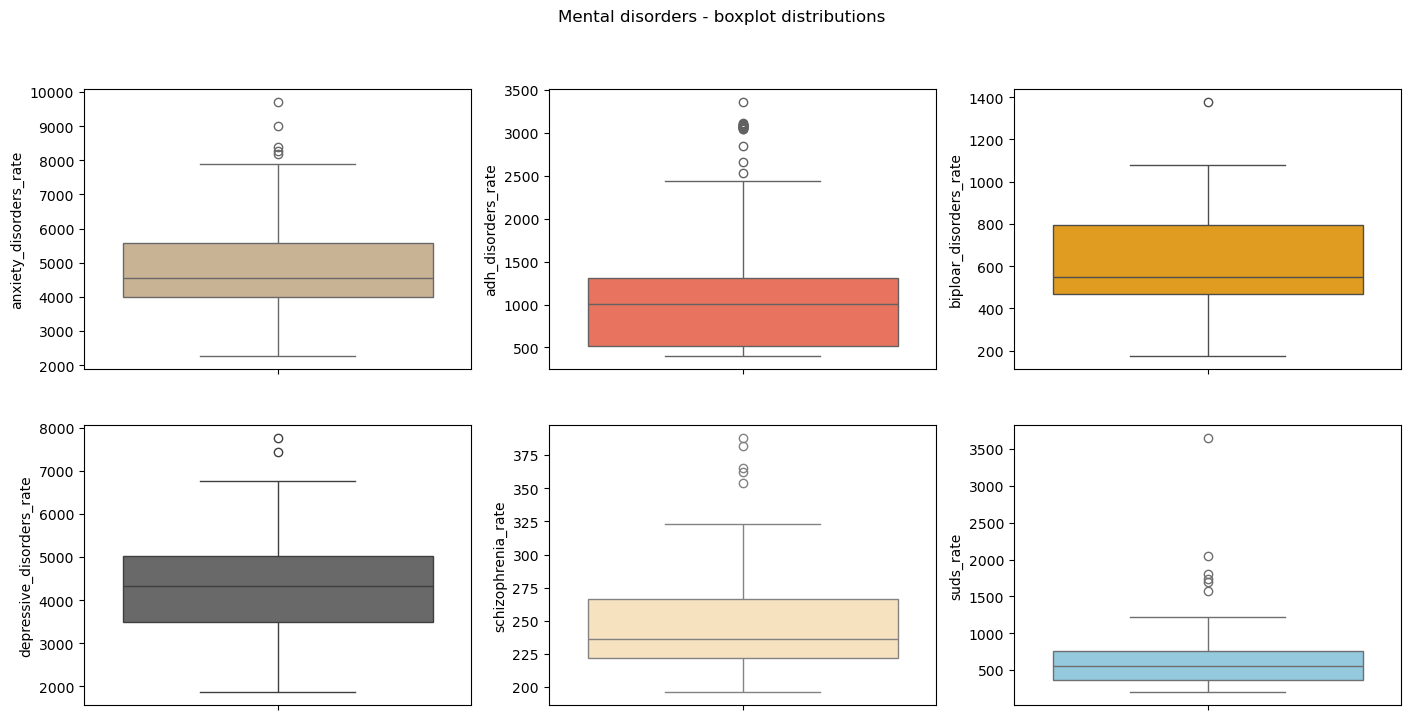

In [13]:
fig, axes = plt.subplots(2, 3, figsize = (17, 8))

sns.boxplot(data['anxiety_disorders_rate'], ax = axes[0, 0], color = 'tan')
sns.boxplot(data['adh_disorders_rate'], ax = axes[0, 1], color = 'tomato')
sns.boxplot(data['biploar_disorders_rate'], ax = axes[0, 2], color = 'orange')
sns.boxplot(data['depressive_disorders_rate'], ax = axes[1, 0], color = 'dimgray')
sns.boxplot(data['schizophrenia_rate'], ax = axes[1, 1], color = 'moccasin')
sns.boxplot(data['suds_rate'], ax = axes[1, 2], color = 'skyblue')

fig.suptitle('Mental disorders - boxplot distributions')

plt.show()

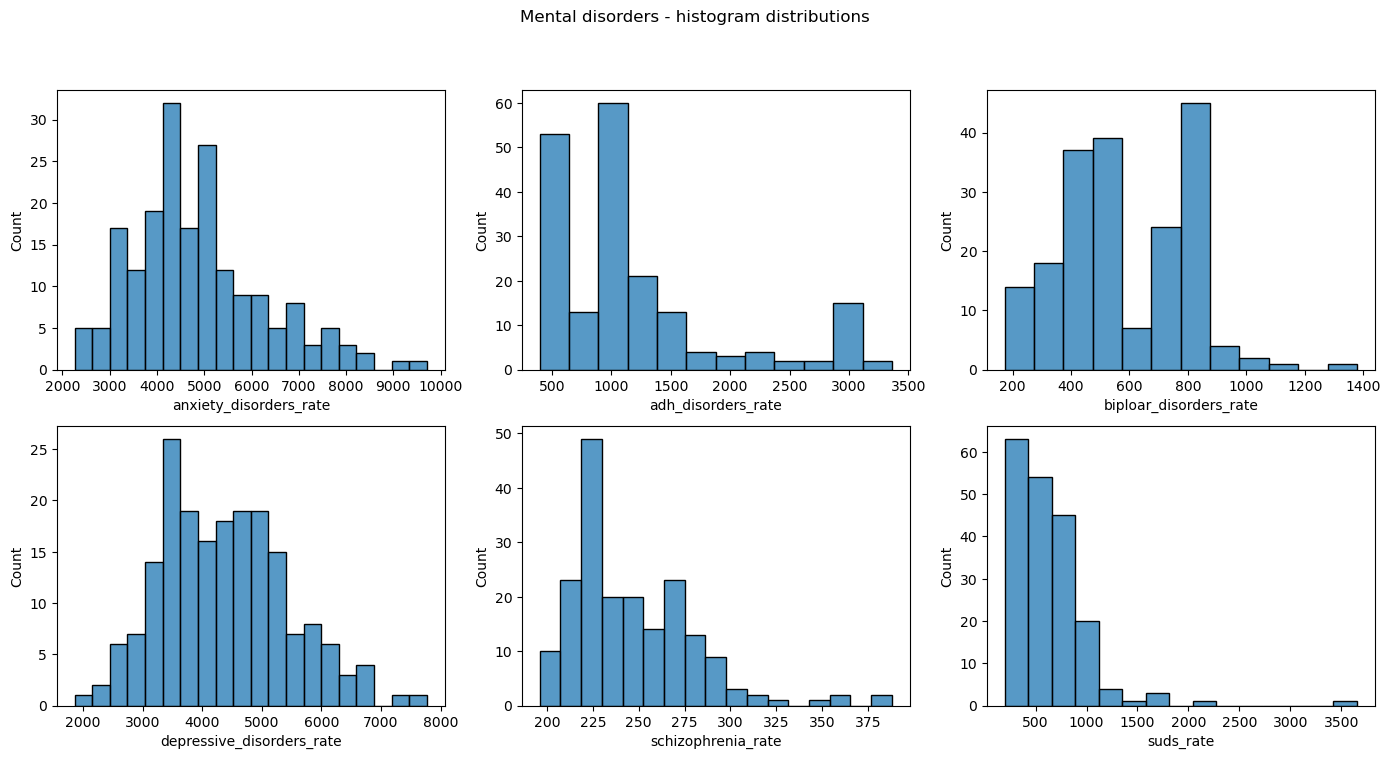

In [14]:
fig, axes = plt.subplots(2, 3, figsize = (17, 8))

sns.histplot(ax = axes[0, 0], data = data, x = 'anxiety_disorders_rate', bins = 20)
sns.histplot(ax = axes[0, 1], data = data, x = 'adh_disorders_rate', bins = 12)
sns.histplot(ax = axes[0, 2], data = data, x = 'biploar_disorders_rate', bins = 12)
sns.histplot(ax = axes[1, 0], data = data, x = 'depressive_disorders_rate', bins = 20)
sns.histplot(ax = axes[1, 1], data = data, x = 'schizophrenia_rate', bins = 17)
sns.histplot(ax = axes[1, 2], data = data, x = 'suds_rate', bins = 15)

fig.suptitle('Mental disorders - histogram distributions')

plt.show()

In [15]:
data[mental_disorders_metrics].skew()

anxiety_disorders_rate       0.773912
adh_disorders_rate           1.424369
biploar_disorders_rate       0.300395
depressive_disorders_rate    0.438958
schizophrenia_rate           1.407610
suds_rate                    3.409399
dtype: float64

Boxplots show that outliers exist in all mental disorders columns. All of them are above the upper fence. Distributions are right skewed, most pronounced at substance use disorder, attention deficit/hyperactivity disorders and schizophrenia. The data suggest that countries with much higer levels of mental disorders exist. Distribution of bipolar disorders has the lowest skewness, the least outliers and is the closest to the normal, suggesting more evenly spread among the countries.

#### Exploring relationships

In [16]:
data.corr(numeric_only = True)

,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
heroin_trade,1.000000,0.021859,0.176982,0.552787,-0.075513,-0.188380,-0.125476,0.023009,0.047555,-0.022671
cocaine_trade,0.021859,1.000000,0.448066,0.016905,0.355727,0.445296,0.483049,-0.006507,-0.035110,0.144817
cannabis_trade,0.176982,0.448066,1.000000,0.282302,0.138495,0.091670,0.260809,0.070973,-0.131536,-0.137172
synthetic_drug_trade,0.552787,0.016905,0.282302,1.000000,0.028324,-0.200633,-0.100594,-0.052065,0.226139,0.033955
anxiety_disorders_rate,-0.075513,0.355727,0.138495,0.028324,1.000000,0.418470,0.684501,0.156989,0.301707,0.400459
adh_disorders_rate,-0.188380,0.445296,0.091670,-0.200633,0.418470,1.000000,0.590138,-0.231781,0.151314,0.491925
biploar_disorders_rate,-0.125476,0.483049,0.260809,-0.100594,0.684501,0.590138,1.000000,0.212042,0.047712,0.320483
depressive_disorders_rate,0.023009,-0.006507,0.070973,-0.052065,0.156989,-0.231781,0.212042,1.000000,-0.257659,-0.162187
schizophrenia_rate,0.047555,-0.035110,-0.131536,0.226139,0.301707,0.151314,0.047712,-0.257659,1.000000,0.466375
suds_rate,-0.022671,0.144817,-0.137172,0.033955,0.400459,0.491925,0.320483,-0.162187,0.466375,1.000000


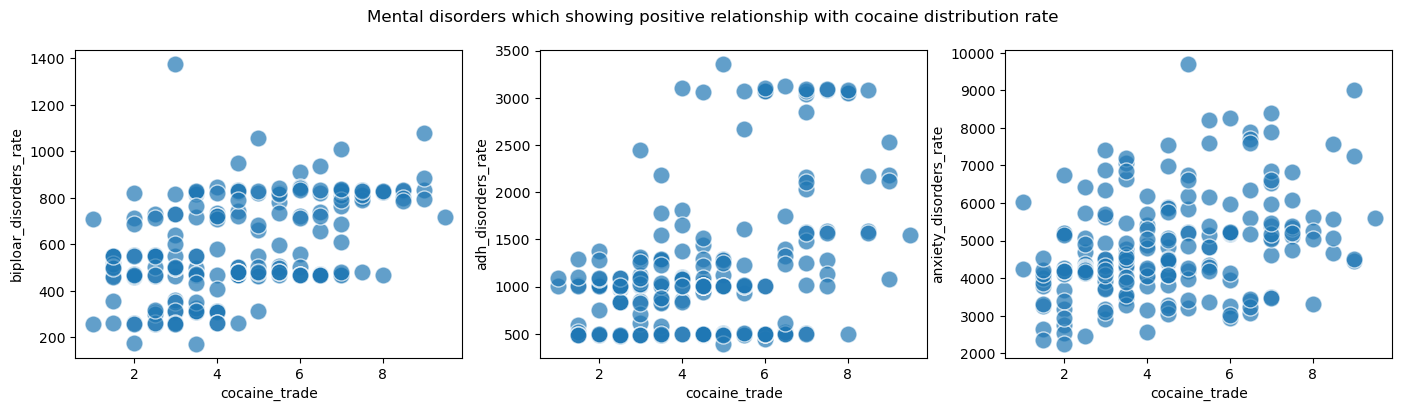

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (17, 4))

sns.scatterplot(ax = axes[0], data = data, x = 'cocaine_trade', y = 'biploar_disorders_rate', s = 150, alpha = 0.7)
sns.scatterplot(ax = axes[1], data = data, x = 'cocaine_trade', y = 'adh_disorders_rate', s = 150, alpha = 0.7)
sns.scatterplot(ax = axes[2], data = data, x = 'cocaine_trade', y = 'anxiety_disorders_rate', s = 150, alpha = 0.7)

fig.suptitle('Mental disorders which showing positive relationship with cocaine distribution rate')

plt.show()

The correlation coefficients calculated on the main dataset indicate that none of the drug trade metrics have a strong relationship with any of mental disorders rates. Noticeable are the moderate positive correlations between cocaine distribution and bipolar and attention deficit/hyperactivity disorers rates. Weak positive relationship also exist between cocaine distribution and anxiety disorders rate.

#### Healthcare index data
The healthcare dataset contains rankikng of healtcare system of countries around the world. It is preprocessed in 'healtcare_preprocess_notebook' and 'merging_notebook'. The information will be used to filter the observations by this measure.

In [18]:
# Loading healthcare index dataset
healthcare_data = pd.read_csv('data/preprocessed_datasets/healthcare_index_by_country.csv')

In [19]:
healthcare_data.describe()

,rank,healthcare_index
count,200.000000,200.000000
mean,100.500000,37.383550
std,57.879185,10.338574
min,1.000000,18.600000
25%,50.750000,33.100000
50%,100.500000,33.100000
75%,150.250000,39.022500
max,200.000000,78.720000


In [20]:
# Countries with healthcare system ranked above index mean value
above_healthcare_mean_countries = healthcare_data[healthcare_data['healthcare_index'] >= healthcare_data['healthcare_index'].mean()]

In [21]:
data[data['country'].isin(above_healthcare_mean_countries['country'])].corr(numeric_only = True)

,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
heroin_trade,1.000000,0.205956,0.309884,0.413662,-0.184036,-0.171711,-0.322728,0.012669,-0.065291,0.000515
cocaine_trade,0.205956,1.000000,0.544361,0.225047,0.398165,0.141354,0.300081,0.184506,0.038846,0.149292
cannabis_trade,0.309884,0.544361,1.000000,0.376969,0.109779,-0.223864,0.003386,0.196520,-0.169403,-0.286078
synthetic_drug_trade,0.413662,0.225047,0.376969,1.000000,-0.176117,-0.072658,-0.134398,-0.047026,0.187248,0.093760
anxiety_disorders_rate,-0.184036,0.398165,0.109779,-0.176117,1.000000,0.276253,0.649577,0.577577,0.343972,0.255372
adh_disorders_rate,-0.171711,0.141354,-0.223864,-0.072658,0.276253,1.000000,0.480857,0.147594,0.593113,0.524030
biploar_disorders_rate,-0.322728,0.300081,0.003386,-0.134398,0.649577,0.480857,1.000000,0.437360,0.424612,0.304417
depressive_disorders_rate,0.012669,0.184506,0.196520,-0.047026,0.577577,0.147594,0.437360,1.000000,0.123376,0.223247
schizophrenia_rate,-0.065291,0.038846,-0.169403,0.187248,0.343972,0.593113,0.424612,0.123376,1.000000,0.465711
suds_rate,0.000515,0.149292,-0.286078,0.093760,0.255372,0.524030,0.304417,0.223247,0.465711,1.000000


The correlation matrix of the dataset, filtered to countries with healthcare ranks above the average, do not indicate any significant change of positive relationships. Moreover the most of the coefficients decreased, which may suggest that in these countries, as a result of better healtcare, the mental illnesses cases have lower rates. Good healthcare can lead to lower rates of untreated mental health conditions, which can decrease the overall prevalence of mental disorders. The better healthcare services also can help to prevent mental disorders from escalating to higher levels.

As seeking positive relationships between drugs and disorders metrics, it is worth to explore the observations within the extremes of the drug distributions and mental disorders rates. I will split the dataset by different drugs, and also by different disorders, taking only observations with higher values of these metrics. Correlation coefficients will be calculated on the resulted subsets.

#### Countries with high levels of drugs distribution

In [22]:
# Countries with high levels of heroin trade
high_heroin_trade_countries = data[data['heroin_trade'] > np.percentile(data['heroin_trade'], 85)][np.append(['country', 'heroin_trade'], mental_disorders_metrics)].sort_values(by = 'heroin_trade', ascending = False)

In [23]:
# Countries with high levels of cocain trade
high_cocaine_trade_countries = data[data['cocaine_trade'] > np.percentile(data['cocaine_trade'], 85)][np.append(['country', 'cocaine_trade'], mental_disorders_metrics)].sort_values(by = 'cocaine_trade', ascending = False)

In [24]:
# Countries with high levels of cannabis trade
high_cannabis_trade_countries = data[data['cannabis_trade'] > np.percentile(data['cannabis_trade'], 85)][np.append(['country', 'cannabis_trade'], mental_disorders_metrics)].sort_values(by = 'cannabis_trade', ascending = False)

In [25]:
# Countries with high levels of synthetic drugs trade
high_syntethics_trade_countries = data[data['synthetic_drug_trade'] > np.percentile(data['synthetic_drug_trade'], 85)][np.append(['country', 'synthetic_drug_trade'], mental_disorders_metrics)].sort_values(by = 'synthetic_drug_trade', ascending = False)

In [26]:
high_heroin_trade_countries.corr(numeric_only = True)

,heroin_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
heroin_trade,1.000000,0.420843,0.316653,0.160640,0.171550,0.049166,-0.093603
anxiety_disorders_rate,0.420843,1.000000,0.512974,0.551995,0.452998,-0.059525,0.119892
adh_disorders_rate,0.316653,0.512974,1.000000,0.295530,-0.060898,0.091483,0.258192
biploar_disorders_rate,0.160640,0.551995,0.295530,1.000000,0.599612,-0.470602,-0.248349
depressive_disorders_rate,0.171550,0.452998,-0.060898,0.599612,1.000000,-0.515744,-0.337288
schizophrenia_rate,0.049166,-0.059525,0.091483,-0.470602,-0.515744,1.000000,0.298207
suds_rate,-0.093603,0.119892,0.258192,-0.248349,-0.337288,0.298207,1.000000


The upper extremes of heroin distribution shows some strengthened but still moderate correlations than in the whole dataset. This may indicate that the levels of these disorders are higher in countries which has higher heroin distribution rates. 

In [27]:
high_heroin_trade_countries[high_heroin_trade_countries['country'].isin(above_healthcare_mean_countries['country'])].corr(numeric_only = True)

,heroin_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
heroin_trade,1.000000,-0.075267,0.412270,0.826407,0.530995,0.335023,-0.400691
anxiety_disorders_rate,-0.075267,1.000000,-0.916464,0.482981,0.729052,0.835330,0.241590
adh_disorders_rate,0.412270,-0.916464,1.000000,-0.172227,-0.394289,-0.705282,-0.171727
biploar_disorders_rate,0.826407,0.482981,-0.172227,1.000000,0.813179,0.799616,-0.335239
depressive_disorders_rate,0.530995,0.729052,-0.394289,0.813179,1.000000,0.710664,0.263724
schizophrenia_rate,0.335023,0.835330,-0.705282,0.799616,0.710664,1.000000,-0.288322
suds_rate,-0.400691,0.241590,-0.171727,-0.335239,0.263724,-0.288322,1.000000


When filtered to countries with better healthcare systems, some correlattion coefficients become even higher. They indicate strong positive relationship with bipolar disorder rates, and also moderate positive relationships with depressive and adh disorders.

In [28]:
high_cocaine_trade_countries.corr(numeric_only = True)

,cocaine_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
cocaine_trade,1.000000,0.215245,-0.001034,0.274852,-0.306023,0.163028,0.020679
anxiety_disorders_rate,0.215245,1.000000,0.176442,0.650207,-0.042109,0.280480,0.557412
adh_disorders_rate,-0.001034,0.176442,1.000000,0.482463,0.238584,-0.486722,0.411708
biploar_disorders_rate,0.274852,0.650207,0.482463,1.000000,0.098492,0.249711,0.553639
depressive_disorders_rate,-0.306023,-0.042109,0.238584,0.098492,1.000000,-0.407771,0.047056
schizophrenia_rate,0.163028,0.280480,-0.486722,0.249711,-0.407771,1.000000,0.093023
suds_rate,0.020679,0.557412,0.411708,0.553639,0.047056,0.093023,1.000000


The correlations between cocaine distribution and mental disorders become weaker while exploring only the countries with extreme values of this drug.

In [29]:
high_cocaine_trade_countries[high_cocaine_trade_countries['country'].isin(above_healthcare_mean_countries['country'])].corr(numeric_only = True)

,cocaine_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
cocaine_trade,1.000000,0.096016,0.463032,0.774228,-0.286103,-0.784465,-0.270126
anxiety_disorders_rate,0.096016,1.000000,0.886655,0.693495,0.078197,-0.435708,0.868006
adh_disorders_rate,0.463032,0.886655,1.000000,0.915642,-0.294079,-0.536636,0.726439
biploar_disorders_rate,0.774228,0.693495,0.915642,1.000000,-0.266734,-0.773740,0.390051
depressive_disorders_rate,-0.286103,0.078197,-0.294079,-0.266734,1.000000,-0.293496,-0.157899
schizophrenia_rate,-0.784465,-0.435708,-0.536636,-0.773740,-0.293496,1.000000,0.061501
suds_rate,-0.270126,0.868006,0.726439,0.390051,-0.157899,0.061501,1.000000


The same dataset are filtered to countries with healthcare ranks above the average. Some coefficients changed significantly, showinh strong positive relationship between cocaine distribution and bipolar disorder rate.

In [30]:
high_cannabis_trade_countries.corr(numeric_only = True)

,cannabis_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
cannabis_trade,1.000000,0.404682,0.205910,0.400736,0.246341,-0.157535,0.133299
anxiety_disorders_rate,0.404682,1.000000,0.280743,0.800509,0.289540,-0.252115,0.302721
adh_disorders_rate,0.205910,0.280743,1.000000,0.591651,-0.458824,-0.597737,0.809317
biploar_disorders_rate,0.400736,0.800509,0.591651,1.000000,0.027171,-0.574281,0.502108
depressive_disorders_rate,0.246341,0.289540,-0.458824,0.027171,1.000000,0.139836,-0.495103
schizophrenia_rate,-0.157535,-0.252115,-0.597737,-0.574281,0.139836,1.000000,-0.328798
suds_rate,0.133299,0.302721,0.809317,0.502108,-0.495103,-0.328798,1.000000


The correlations between cannabis distribution and mental disorders are strengthened while exploring only the countries with extreme values of cannabis trade.

In [31]:
high_cannabis_trade_countries[high_cannabis_trade_countries['country'].isin(above_healthcare_mean_countries['country'])].corr(numeric_only = True)

,cannabis_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
cannabis_trade,1.000000,0.652584,0.128420,0.563025,0.928530,-0.599387,0.047119
anxiety_disorders_rate,0.652584,1.000000,0.770826,0.799981,0.475722,-0.729432,0.774578
adh_disorders_rate,0.128420,0.770826,1.000000,0.829994,-0.168794,-0.748689,0.970321
biploar_disorders_rate,0.563025,0.799981,0.829994,1.000000,0.228020,-0.989366,0.697290
depressive_disorders_rate,0.928530,0.475722,-0.168794,0.228020,1.000000,-0.261181,-0.185729
schizophrenia_rate,-0.599387,-0.729432,-0.748689,-0.989366,-0.261181,1.000000,-0.589197
suds_rate,0.047119,0.774578,0.970321,0.697290,-0.185729,-0.589197,1.000000


When filtered only to countries with healthcare system ranked above the mean, some correlation coefficients grows showing even strong and very strong correlations. 

In [32]:
high_syntethics_trade_countries.corr(numeric_only = True)

,synthetic_drug_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
synthetic_drug_trade,1.000000,-0.038214,-0.038176,0.008597,-0.033408,-0.328790,-0.302879
anxiety_disorders_rate,-0.038214,1.000000,0.351300,0.682657,0.675849,0.157630,0.282808
adh_disorders_rate,-0.038176,0.351300,1.000000,0.111524,0.134350,0.349407,0.401371
biploar_disorders_rate,0.008597,0.682657,0.111524,1.000000,0.748306,-0.221470,0.076063
depressive_disorders_rate,-0.033408,0.675849,0.134350,0.748306,1.000000,-0.220244,0.277042
schizophrenia_rate,-0.328790,0.157630,0.349407,-0.221470,-0.220244,1.000000,0.495887
suds_rate,-0.302879,0.282808,0.401371,0.076063,0.277042,0.495887,1.000000


There are no positive correlations in the dataset containing only higher extremes of syntethic drugs distribution.

In [33]:
high_syntethics_trade_countries[high_syntethics_trade_countries['country'].isin(above_healthcare_mean_countries['country'])].corr(numeric_only = True)

,synthetic_drug_trade,anxiety_disorders_rate,adh_disorders_rate,biploar_disorders_rate,depressive_disorders_rate,schizophrenia_rate,suds_rate
synthetic_drug_trade,1.000000,-0.261426,0.010840,0.192116,-0.049923,-0.219715,-0.306219
anxiety_disorders_rate,-0.261426,1.000000,-0.024548,0.612212,0.788696,0.392561,0.272671
adh_disorders_rate,0.010840,-0.024548,1.000000,-0.578752,-0.219791,0.669135,0.495425
biploar_disorders_rate,0.192116,0.612212,-0.578752,1.000000,0.688735,-0.163377,-0.124175
depressive_disorders_rate,-0.049923,0.788696,-0.219791,0.688735,1.000000,0.031731,0.377866
schizophrenia_rate,-0.219715,0.392561,0.669135,-0.163377,0.031731,1.000000,0.514004
suds_rate,-0.306219,0.272671,0.495425,-0.124175,0.377866,0.514004,1.000000


The coefficients are similar while filtering only to countries with good healthcare system.

Although at first glance it appears that there are significant relationships in the countries with better healthcare rank, the double filtering reduces the number of observations to only four or a little more. This drastically reduces the significance of the results making them insignificant.

#### Countries with high levels of mental distorders

In [34]:
# Countries with high levels of anxiety disorders
high_anxiety_disorders_countries = data[data['anxiety_disorders_rate'] > np.percentile(data['anxiety_disorders_rate'], 85)][np.append(['country', 'anxiety_disorders_rate'], drug_trade_metrics)].sort_values(by = 'anxiety_disorders_rate', ascending = False)

In [35]:
# Countries with high levels of adh disorders
high_adh_disorders_rate = data[data['adh_disorders_rate'] > np.percentile(data['adh_disorders_rate'], 85)][np.append(['country', 'adh_disorders_rate'], drug_trade_metrics)].sort_values(by = 'adh_disorders_rate', ascending = False)

In [36]:
# Countries with high levels of biploar disorders
high_biploar_disorders_rate = data[data['biploar_disorders_rate'] > np.percentile(data['biploar_disorders_rate'], 85)][np.append(['country', 'biploar_disorders_rate'], drug_trade_metrics)].sort_values(by = 'biploar_disorders_rate', ascending = False)

In [37]:
high_depressive_disorders_countries = data[data['depressive_disorders_rate'] > np.percentile(data['depressive_disorders_rate'], 85)][np.append(['country', 'depressive_disorders_rate'], drug_trade_metrics)].sort_values(by = 'depressive_disorders_rate', ascending = False)

In [38]:
high_schizophrenia_countries = data[data['schizophrenia_rate'] > np.percentile(data['schizophrenia_rate'], 85)][np.append(['country', 'schizophrenia_rate'], drug_trade_metrics)].sort_values(by = 'schizophrenia_rate', ascending = False)

In [39]:
high_suds_countries = data[data['suds_rate'] > np.percentile(data['suds_rate'], 85)][np.append(['country', 'suds_rate'], drug_trade_metrics)].sort_values(by = 'suds_rate', ascending = False)

In [40]:
high_anxiety_disorders_countries.corr(numeric_only = True)

,anxiety_disorders_rate,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
anxiety_disorders_rate,1.000000,0.161443,0.387333,0.440140,0.182877
heroin_trade,0.161443,1.000000,0.124096,0.037119,0.519807
cocaine_trade,0.387333,0.124096,1.000000,0.372000,0.175839
cannabis_trade,0.440140,0.037119,0.372000,1.000000,0.565525
synthetic_drug_trade,0.182877,0.519807,0.175839,0.565525,1.000000


In the countries with higher rates of anxiety disorders, some correlation coefficients become higher, suggesting potential moderate relationships between this type of disorders and coacaine and especially cannabis distribution.

In [41]:
high_adh_disorders_rate.corr(numeric_only = True)

,adh_disorders_rate,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
adh_disorders_rate,1.000000,-0.394688,-0.020407,0.012594,-0.522256
heroin_trade,-0.394688,1.000000,-0.290250,-0.197557,0.810604
cocaine_trade,-0.020407,-0.290250,1.000000,0.171463,-0.445566
cannabis_trade,0.012594,-0.197557,0.171463,1.000000,-0.177462
synthetic_drug_trade,-0.522256,0.810604,-0.445566,-0.177462,1.000000


In [42]:
high_biploar_disorders_rate.corr(numeric_only = True)

,biploar_disorders_rate,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
biploar_disorders_rate,1.000000,0.003415,-0.251304,0.053104,0.403225
heroin_trade,0.003415,1.000000,0.130125,-0.035107,0.735287
cocaine_trade,-0.251304,0.130125,1.000000,0.271805,-0.018036
cannabis_trade,0.053104,-0.035107,0.271805,1.000000,0.198687
synthetic_drug_trade,0.403225,0.735287,-0.018036,0.198687,1.000000


Bipolar disorder rate show a moderate positive relationship with synthetics distribution, suggesting possible relationship among countries with higher levels of this mental illness.

In [43]:
high_depressive_disorders_countries.corr(numeric_only = True)

,depressive_disorders_rate,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
depressive_disorders_rate,1.000000,-0.296114,-0.116311,-0.065216,-0.157626
heroin_trade,-0.296114,1.000000,-0.001050,0.423003,0.487783
cocaine_trade,-0.116311,-0.001050,1.000000,0.181916,0.058522
cannabis_trade,-0.065216,0.423003,0.181916,1.000000,0.452085
synthetic_drug_trade,-0.157626,0.487783,0.058522,0.452085,1.000000


In [44]:
high_suds_countries.corr(numeric_only = True)

,suds_rate,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
suds_rate,1.000000,0.361324,-0.019094,-0.250776,0.546547
heroin_trade,0.361324,1.000000,0.140468,-0.051177,0.689712
cocaine_trade,-0.019094,0.140468,1.000000,0.715401,-0.065042
cannabis_trade,-0.250776,-0.051177,0.715401,1.000000,-0.207283
synthetic_drug_trade,0.546547,0.689712,-0.065042,-0.207283,1.000000


Substance use disorders also show some moderate positive relationship with synthetics.

In [45]:
high_schizophrenia_countries.corr(numeric_only = True)

,schizophrenia_rate,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
schizophrenia_rate,1.000000,0.117772,0.472645,-0.022914,0.228572
heroin_trade,0.117772,1.000000,0.188641,0.346507,0.422485
cocaine_trade,0.472645,0.188641,1.000000,0.468516,0.460872
cannabis_trade,-0.022914,0.346507,0.468516,1.000000,0.536915
synthetic_drug_trade,0.228572,0.422485,0.460872,0.536915,1.000000


Among countries with higher schizophrenia rates, the the correlation coefficients indicate moderate positive relationship with cocaine distribution. 

#### Statistical significance tests

The EDA revealed several relationships with moderate strength, each measured with Pearson\' correlation method. The most significant ones are between cocaine distribution and
biploar, attention deficit/hyperactivity, anxiety and schizophrenia disorders rates.


Performing T - test for correlation on each of the above coefficients will determine if they are statistically significant. The choosen significance level is $\alpha$ = 0.05.

In [46]:
significance_level = 0.05

In [47]:
test_features = [
    [data, 'cocaine_trade', 'biploar_disorders_rate', 'Main dataset', significance_level],
    [data, 'cocaine_trade', 'adh_disorders_rate', 'Main dataset', significance_level],
    [data, 'cocaine_trade', 'anxiety_disorders_rate', 'Main dataset', significance_level],
    [high_schizophrenia_countries, 'cocaine_trade', 'schizophrenia_rate', 'Dataset with high rates of schizophrenia', significance_level]
]

In [48]:
test_results = functions.return_significance_test_results_on_corr_coeff(test_features)

In [49]:
for key, value in test_results.items():
    print(key, value)
    print()

Main dataset: cocaine_trade to biploar_disorders_rate correlation coefficient= 0.48, p_value= 0.0, statistically significant: True

Main dataset: cocaine_trade to adh_disorders_rate correlation coefficient= 0.45, p_value= 0.0, statistically significant: True

Main dataset: cocaine_trade to anxiety_disorders_rate correlation coefficient= 0.36, p_value= 4e-07, statistically significant: True

Dataset with high rates of schizophrenia: cocaine_trade to schizophrenia_rate correlation coefficient= 0.47, p_value= 0.0110899, statistically significant: True



The results of significance tests indicate that all of the above moderate in strength relationships are statistically significant.

### Conclusion

The most noticeable and statistically signifficant correlations, found in the whole dataset, are between the level of cocaine trade and the rates of mental disorders. They suggest that higher level of cocaine trade might be associated with higher rates of the corresponding mental illnesses.

Subsetting the data on parts to examine the upper extremes of drugs distributions resulted in little increasing of correlation coefficients, still not suggesting stronger than moderate positive relationships. Similar are the results of subsetting the data, observing higher levels of mental disorders distributions.

Аs for the main question of this research: **is there a relationship between the level of illicit drug market and the rate of mental health issues**, the observations from the EDA and the results of statistical significance tests, suggest, that there **may be** a moderate in strength relationship between cocaine distribution and some mental health disorders. However, the strenght of these potential correlations suggest the presence of other factors that influence stronger the rates of mental illness. Also, because of the complex reach of drugs trade metrics, even where relationships exist, they should not be considered as the primary factor.

Тhe project question as well as the working hypothesis remain open for future research. The analysis can be refined in different ways, such as analyzing data which contains direct information about drug use levels. Data for larger period can be gathered since this study examine only 2021. This way, the results of analysis will become more reliable.

<a id='ref'></a>

### References
1. [Mental disorders - WHO](https://www.who.int/news-room/fact-sheets/detail/mental-disorders)
2. [Substance use disorders - National library of medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8324330/#R1)
3. [Comorbidity between SUDs and mental illnesses - Natioanl institute of drug abuse](https://nida.nih.gov/publications/research-reports/common-comorbidities-substance-use-disorders/why-there-comorbidity-between-substance-use-disorders-mental-illnesses)
4. [Drug Abuse and Mental Illness - National Drug Intelligence Center](https://www.justice.gov/archive/ndic/pubs7/7343/index.htm#What)
5. [Drug markets - EU Drugs Agency](https://www.euda.europa.eu/publications/eu-drug-markets_en)
6. [Institute for Health Metrics and Evaluation ](https://www.healthdata.org/)
7. [Global Organized Crime Index](https://ocindex.net/)
8. [How Illicit Drugs Can Affect Your Mental Health](https://pacifichealthsystems.com/blog/how-illicit-drugs-can-affect-your-mental-health/)
9. [SUD - Wikipedia](https://en.wikipedia.org/wiki/Substance_use_disorder)
10. [Drugs and mental health - Mental health foundation](https://www.mentalhealth.org.uk/explore-mental-health/a-z-topics/drugs-and-mental-health)